# About Dataset

**Internet Service Provider Customer Churn**

**Context** :
There is a big competition between Internet providers. If a providers want to increase its revenue they needs more subscriber but keep existing customer is more important than having new ones. So providers want to know which customer should cancel his service. we call this as churn. if the know who will go, maybe they can catch them with promotions.

**Features**

* **id** :
unique subscriber id

* **is_tv_subscriber** :
customer has a tv subscription ?

* **is_movie_package_subscriber** :
is he/she has a sinema movie package subs

* **subscription_age** :
how many year has the customer use our service

* **bill_avg** :
last 3 months bill avg

* **reamining_contract** :
how many year remaining for customer contract. if null; customer hasnt have a contract. the customer who has a contract time have to use their service until contract end. if they canceled their service before contract time end they pay a penalty fare.

* **service_failure_count** :
customer call count to call center for service failure for last 3 months

* **download_avg** :
last 3 months internet usage (GB)

* **upload_avg** :
last 3 months upload avg (GB)

* **download_over_limit** :
most of customer has a download limit. if they reach this limit they have to pay for this. this column contain "limit over count" for last 9 months

* **churn** :
this is the target column. if 1 customer canceled his service

#Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing

In [ ]:
# initialize directory path
path = "/content/drive/MyDrive/MSIB Celerates/Tugas Async/Tugas 2/data_contoh.csv"

In [ ]:
# load csv file using pandas
df = pd.read_csv(path)

# data shape (row, columns)
df.shape

(72274, 11)

In [ ]:
# show first-5 data
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [ ]:
# show information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [ ]:
# show descriptive statistic
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [ ]:
# count missing values each row
df.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [ ]:
# input missing value with 0
df["reamining_contract"] = df["reamining_contract"].fillna(0)

# input missing value with mean
df["download_avg"] = df["download_avg"].fillna(df["download_avg"].mean())
df["upload_avg"] = df["upload_avg"].fillna(df["upload_avg"].mean())

In [ ]:
# make sure we have handle all missing value
df.isnull().sum()

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

In [ ]:
df["churn"].value_counts()

churn
1    40050
0    32224
Name: count, dtype: int64

In [ ]:
# define features and label
X = df.iloc[:,:-1]
y = df["churn"]

# Modeling

In [ ]:
# split data into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

print(f"Total train data : {len(X_train)}")
print(f"Total test data : {len(X_test)}")

Total train data : 48423
Total test data : 23851


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# modeling using decision tree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     10774
           1       0.98      0.97      0.97     13077

    accuracy                           0.97     23851
   macro avg       0.97      0.97      0.97     23851
weighted avg       0.97      0.97      0.97     23851



<Axes: >

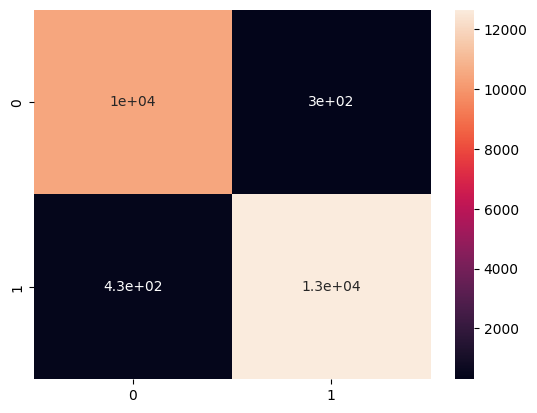

In [ ]:
# show confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)